In [43]:
# This is A snippet for all data related tasks
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [44]:
df=pd.read_csv("iris_data.csv")

In [45]:
df=df.dropna(subset=['petal_width_cm'])

In [46]:
df.shape

(145, 5)

In [47]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
df['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [49]:
df['class'].replace(["Iris-setossa","versicolor"],["Iris-setosa","Iris-versicolor"],inplace=True)

In [50]:
print(df['class'].value_counts())

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        45
Name: class, dtype: int64


In [51]:
final_df=df[df['class']!='Iris-virginica']

In [70]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


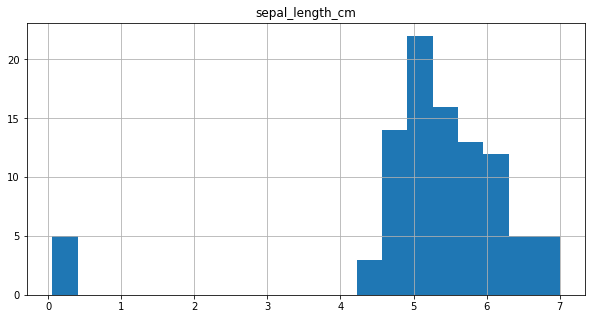

In [53]:
final_df.hist(column='sepal_length_cm',bins=20,figsize=(10,5))
plt.show()

In [54]:
final_df.loc[final_df.sepal_length_cm < 1, ['sepal_length_cm']]= final_df['sepal_length_cm']*100

In [55]:
final_df.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
13,5.7,3.0,1.1,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa


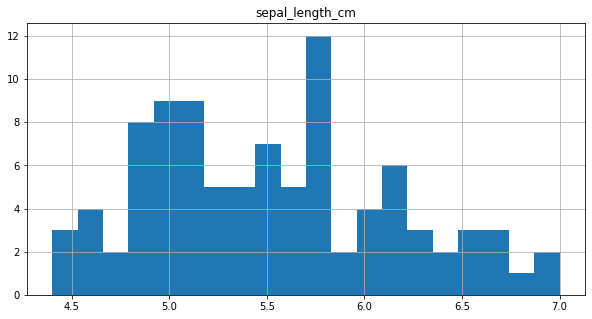

In [56]:
final_df.hist(column='sepal_length_cm',bins=20,figsize=(10,5))
plt.show()

In [57]:
final_df = final_df.drop(final_df[(final_df['class'] == "Iris-setosa") & (final_df['sepal_width_cm'] < 2.5)].index)

In [58]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
final_df['class'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)

In [60]:
inp_df=final_df.drop(final_df.columns[[4]],axis=1)   #took 4th column
out_df=final_df.drop(final_df.columns[[0,1,2,3]],axis=1) #took 0,1,2,3 colums

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(inp_df,out_df,test_size=0.2,random_state=42)

In [65]:
print('Input Shape=',X_train.shape)
print('output Shape=',X_test.shape)

Input Shape= (75, 4)
output Shape= (19, 4)


In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [67]:
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score
acc_ts=accuracy_score(predictions, y_test)
print('Test Accuracy',acc_ts)

Test Accuracy 1.0


In [69]:
predictions = lr.predict(X_train)
acc_ts=accuracy_score(predictions, y_train)
print('Test Accuracy',acc_ts)

Test Accuracy 1.0
